In [2]:
# import relevant modules
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# load 2019 taxi trip data collected by NYC Taxi and Limousine Commission (TLC) into a pandas dataframe
taxis = sn.load_dataset("taxis")

In [4]:
# take a look at the dataset
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [5]:
#How many rows?
taxis.shape[0]

6433

In [6]:
# How many columns?
taxis.shape[1]

14

In [7]:
# How many missing values in each column?
taxis.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [8]:
#What is the average distance traveled by the taxi trips in this dataset?
taxis["distance"].mean()

3.0246168195243133

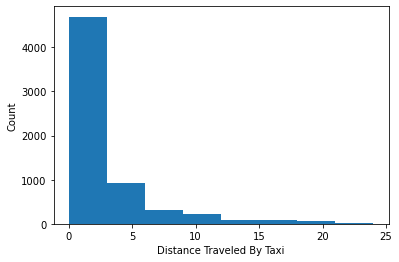

In [9]:
#Create a histogram to visualize the distribution of distances
plt.hist(taxis["distance"], bins = np.arange(0, 25, 3))
plt.xlabel("Distance Traveled By Taxi")
plt.ylabel("Count")
plt.show()

What do notice you about the shape of the distribution given the histogram above?


The distribution is right-skewed, with a peak at the left and a long tail at the right. This indicates that the mean distance is greater than the median distance, and shorter distances are more frequent.

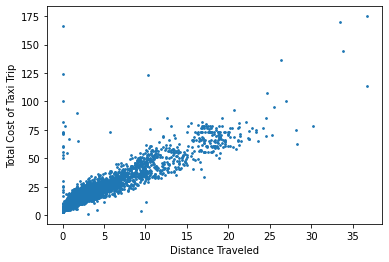

In [10]:
#  a scatterplot to visualize total cost of taxi trip over distance traveled.
plt.scatter(x = taxis["distance"], y = taxis["total"], s = 3)
plt.xlabel("Distance Traveled")
plt.ylabel("Total Cost of Taxi Trip")
plt.show()

What trend do you see in the scatterplot?

There seems to be a positive association between distance traveled and total cost of taxi trip. Taxi trips that cover longer distances cost more.

In [11]:
#Drop the rows where there is a missing value in the "payment" column.
pay = taxis["payment"].dropna()
pay

0       credit card
1              cash
2       credit card
3       credit card
4       credit card
           ...     
6428    credit card
6429    credit card
6430           cash
6431    credit card
6432    credit card
Name: payment, Length: 6389, dtype: object

In [12]:
#Confirm that there are no missing values in the "payment" column .
pay.isna().sum()

0

In [13]:
#What are the different forms of payment?
pay.unique()

array(['credit card', 'cash'], dtype=object)

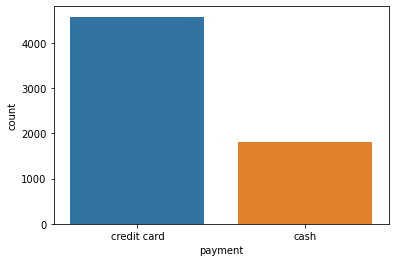

In [14]:
#Create a countplot to visualize how many taxi trips were payed for via each form of payment.
sn.countplot(x = "payment", data = taxis)
plt.show()

From the visualization, what can you tell about the distribution of taxi trips across payment form?
credit cards payment are higher than cash payment

In [15]:
#How many taxi trips were payed for via each form of payment?
pay.value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [16]:
#Drop rows where there is a missing value in the "pickup_borough" column
pick = taxis["pickup_borough"].dropna()

In [17]:
#Confirm that there are no missing values in the "pickup_borough" column now.
pick.isna().sum()

0

In [18]:
#What are the different boroughs from which taxi pickups occur according to the dataset?
pick.unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

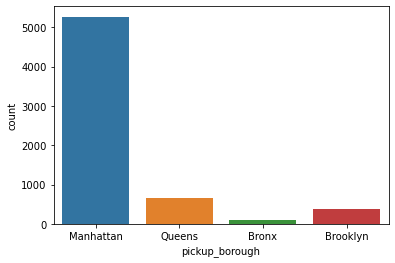

In [19]:
#Create a countplot to visualize the distribution of taxi pickups across borough.
sn.countplot(x = "pickup_borough", data = taxis)
plt.show()

In [20]:
#Drop rows where there is a missing value in the "dropoff_borough" column.
drop = taxis["dropoff_borough"].dropna()

In [21]:
#Confirm that there are no missing values in the "dropoff_borough" column now.
drop.isna().sum()

0

In [22]:
#How many taxi trips did dropoffs in each borough?
drop.value_counts()

Manhattan        5206
Queens            542
Brooklyn          501
Bronx             137
Staten Island       2
Name: dropoff_borough, dtype: int64

In [23]:
#What are the different boroughs from which taxi dropoffs occur according to the dataset?
drop.unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

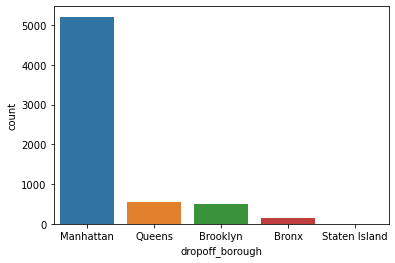

In [24]:
#Create a countplot to visualize the distribution of taxi dropoffs across borough
sn.countplot(x = "dropoff_borough", data = taxis)
plt.show()

In [25]:
#How many taxi trips did pickups in each borough?
pick.value_counts()

Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: pickup_borough, dtype: int64

In [26]:
#Create a subset that only includes taxi trips that picked up passengers in the Brooklyn borough.
brooklyn_pickup = taxis.loc[taxis["pickup_borough"] == "Brooklyn", :]
brooklyn_pickup

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
114,2019-03-05 12:17:49,2019-03-05 12:36:12,1,5.98,19.00,5.58,0.0,27.88,yellow,credit card,Brooklyn Heights,Murray Hill,Brooklyn,Manhattan
155,2019-03-21 22:49:32,2019-03-21 22:55:11,1,1.03,6.00,1.46,0.0,8.76,yellow,credit card,DUMBO/Vinegar Hill,Brooklyn Heights,Brooklyn,Brooklyn
214,2019-03-22 22:40:19,2019-03-22 22:55:26,1,2.75,12.50,0.00,0.0,13.80,yellow,cash,Stuyvesant Heights,Crown Heights North,Brooklyn,Brooklyn
266,2019-03-26 21:42:29,2019-03-26 22:05:23,2,4.40,17.50,3.76,0.0,22.56,yellow,credit card,Fort Greene,Cypress Hills,Brooklyn,Brooklyn
332,2019-03-16 01:14:24,2019-03-16 01:26:45,1,2.60,11.00,0.00,0.0,12.30,yellow,cash,Crown Heights North,Crown Heights South,Brooklyn,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421,2019-03-24 09:07:15,2019-03-24 09:36:45,6,10.23,33.00,0.00,0.0,33.80,green,credit card,East Flatbush/Farragut,South Ozone Park,Brooklyn,Queens
6425,2019-03-07 15:34:30,2019-03-07 16:31:06,1,9.12,26.32,0.00,0.0,26.82,green,credit card,Park Slope,East New York,Brooklyn,Brooklyn
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.00,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.00,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


Take a look at the subset.

In [27]:
#How many rows in the subset?
brooklyn_pickup.shape[0]

383

In [28]:
#How many columns in the subset?
brooklyn_pickup.shape[1]

14

In [29]:
# What are the pickup zones in the pickup borough Brooklyn in order of most taxi trips to 
# least taxi trips, along with the corresponding counts?
brooklyn_pickup_counts = brooklyn_pickup["pickup_zone"].value_counts()
brooklyn_pickup_counts

Fort Greene                     39
Downtown Brooklyn/MetroTech     37
Brooklyn Heights                34
Park Slope                      22
Boerum Hill                     21
Williamsburg (North Side)       15
DUMBO/Vinegar Hill              15
Crown Heights North             12
Cobble Hill                     11
Williamsburg (South Side)       11
East New York                   10
Greenpoint                       9
Stuyvesant Heights               9
Bushwick South                   9
Sheepshead Bay                   8
Carroll Gardens                  7
Clinton Hill                     7
East Flatbush/Farragut           7
Coney Island                     6
Midwood                          6
Starrett City                    6
East Flatbush/Remsen Village     6
East Williamsburg                5
Bushwick North                   5
Flatbush/Ditmas Park             4
Brownsville                      4
Prospect Heights                 4
Crown Heights South              4
Prospect-Lefferts Ga

In [48]:
#What are the pickup zones with the 5 highest counts? 
zones = brooklyn_pickup_counts.iloc[0:5]
zones

Fort Greene                    39
Downtown Brooklyn/MetroTech    37
Brooklyn Heights               34
Park Slope                     22
Boerum Hill                    21
Name: pickup_zone, dtype: int64

In [50]:
#Create a subset for taxi trips involving pickup in any of the 5 zones identified above.
brooklyn_pickup_5 = brooklyn_pickup.loc[brooklyn_pickup["pickup_zone"].apply(lambda zone: zone in zones), :]
brooklyn_pickup_5

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
114,2019-03-05 12:17:49,2019-03-05 12:36:12,1,5.98,19.00,5.58,0.00,27.88,yellow,credit card,Brooklyn Heights,Murray Hill,Brooklyn,Manhattan
266,2019-03-26 21:42:29,2019-03-26 22:05:23,2,4.40,17.50,3.76,0.00,22.56,yellow,credit card,Fort Greene,Cypress Hills,Brooklyn,Brooklyn
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.30,5.50,0.00,0.00,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
694,2019-03-13 11:12:11,2019-03-13 11:47:17,1,7.00,28.50,6.35,0.00,38.15,yellow,credit card,Brooklyn Heights,Midtown East,Brooklyn,Manhattan
1218,2019-03-08 09:46:36,2019-03-08 10:25:44,1,17.09,49.50,0.00,5.76,56.06,yellow,credit card,Boerum Hill,Soundview/Castle Hill,Brooklyn,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405,2019-03-21 18:28:55,2019-03-21 18:51:08,2,3.88,16.50,0.00,0.00,18.30,green,cash,Boerum Hill,Ocean Hill,Brooklyn,Brooklyn
6411,2019-03-25 18:28:05,2019-03-25 18:33:30,1,1.10,6.00,1.00,0.00,8.80,green,credit card,Brooklyn Heights,Columbia Street,Brooklyn,Brooklyn
6412,2019-03-20 17:33:25,2019-03-20 17:42:48,5,1.40,8.00,0.00,0.00,9.80,green,cash,Brooklyn Heights,Fort Greene,Brooklyn,Brooklyn
6425,2019-03-07 15:34:30,2019-03-07 16:31:06,1,9.12,26.32,0.00,0.00,26.82,green,credit card,Park Slope,East New York,Brooklyn,Brooklyn


In [51]:
#How many rows in this subset?
brooklyn_pickup_5.shape[0]

153

In [53]:
#How many columns in this subset?
brooklyn_pickup_5.shape[1]

14

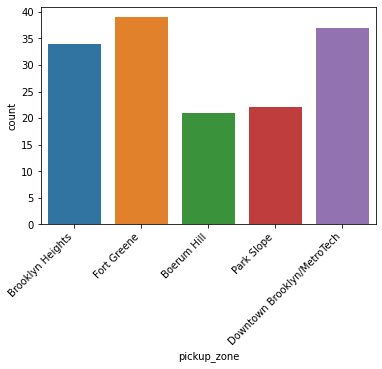

In [54]:
#Create a countplot to visualize the distribution of taxi trips across the "top 5" pickup zones in pickup borough Brooklyn.
sn.countplot(x = "pickup_zone", data = brooklyn_pickup_5)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

What is one thing you notice from the barplot above?  

Fort Green is the pickup zone with the most number of taxi trips in Brooklyn.

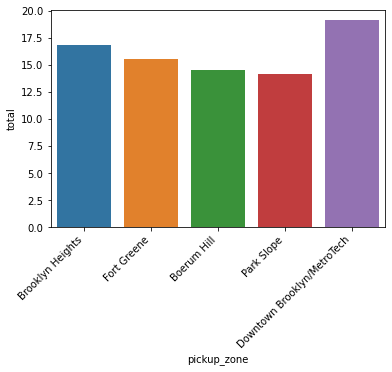

In [60]:
#Create a barplot to visualize the total cost on average across each of the "top 5" pickup zones in pickup borough Brooklyn
sn.barplot(x = "pickup_zone", y="total", data = brooklyn_pickup_5, ci=False)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

What is one thing you notice from the barplot above?  
Downtown Brooklyn/MetroTech is the pickup zone with the highest average total cost for taxi trips in Brooklyn.
